# **Samples of Functions Drawn from Gaussian Processes for Different Kernels :**
$$f(\mathbf{x}) = \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x},\mathbf{x^{'}}))$$
* We specify a set of input points $x = \{x_1,...,x_N\}$ and an $N \times N$ covariance matrix $K$.
* We draw a vector $(y_1,...,y_N)$ from the gaussian defined by $\mathbf{y} = N(0, K)$.

In [20]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt
from modules.ExactGP_regression import *
from modules.kernels import *
from modules.train_GP_regression import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# ficticious data
train_x = torch.linspace(0, 1, 100)
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)
# sampling points
sampling_points = torch.linspace(-10, 10, 1000)

## **Testing With Different Kernels :**

In [13]:
# initialize likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()
# How many functions to sample
T = 3

In [14]:
kernels = {"Linear Kernel" : gpytorch.kernels.LinearKernel(), "Gaussian Kernel 2":GaussianKernel(sigma_squared = 2), "Gaussian Kernel 50":GaussianKernel(sigma_squared = 50)}

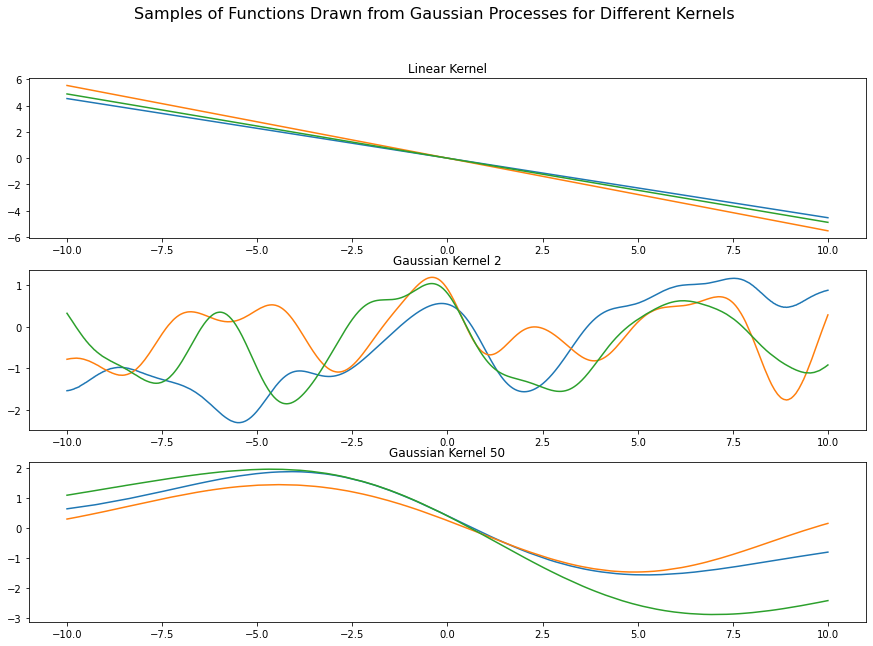

In [17]:
plt.figure(figsize=(len(kernels)*5, 10))
plt.suptitle("Samples of Functions Drawn from Gaussian Processes for Different Kernels", fontsize=16)      
for i,kernel_name in enumerate(kernels):
    ax = plt.subplot(len(kernels), 1, i+1)
    ax.set_title(kernel_name)
    model = ExactGP_Regression(train_x, train_y, likelihood, kernel = kernels[kernel_name])
    # Set into posterior mode
    model.eval()
    likelihood.eval()
    # sample functions
    preds = model(sampling_points)
    for _ in range(T):
        y = preds.sample()
        plt.plot(sampling_points, y)

## **Example of Training GP :**

In [35]:
test_model = ExactGP_Regression(train_x, train_y, likelihood, kernel = gpytorch.kernels.RBFKernel())
train(test_model, likelihood, 50)

Iter 1/50 - Loss: 1.268   lengthscale: 0.644   noise: 0.040
Iter 2/50 - Loss: 0.906   lengthscale: 0.598   noise: 0.044
Iter 3/50 - Loss: 0.618   lengthscale: 0.555   noise: 0.047
Iter 4/50 - Loss: 0.401   lengthscale: 0.515   noise: 0.051
Iter 5/50 - Loss: 0.247   lengthscale: 0.479   noise: 0.054
Iter 6/50 - Loss: 0.143   lengthscale: 0.447   noise: 0.057
Iter 7/50 - Loss: 0.074   lengthscale: 0.417   noise: 0.059
Iter 8/50 - Loss: 0.029   lengthscale: 0.392   noise: 0.060
Iter 9/50 - Loss: 0.000   lengthscale: 0.369   noise: 0.061
Iter 10/50 - Loss: -0.019   lengthscale: 0.349   noise: 0.061
Iter 11/50 - Loss: -0.032   lengthscale: 0.331   noise: 0.060
Iter 12/50 - Loss: -0.042   lengthscale: 0.316   noise: 0.060
Iter 13/50 - Loss: -0.049   lengthscale: 0.302   noise: 0.058
Iter 14/50 - Loss: -0.055   lengthscale: 0.290   noise: 0.057
Iter 15/50 - Loss: -0.061   lengthscale: 0.280   noise: 0.055
Iter 16/50 - Loss: -0.065   lengthscale: 0.271   noise: 0.053
Iter 17/50 - Loss: -0.069 

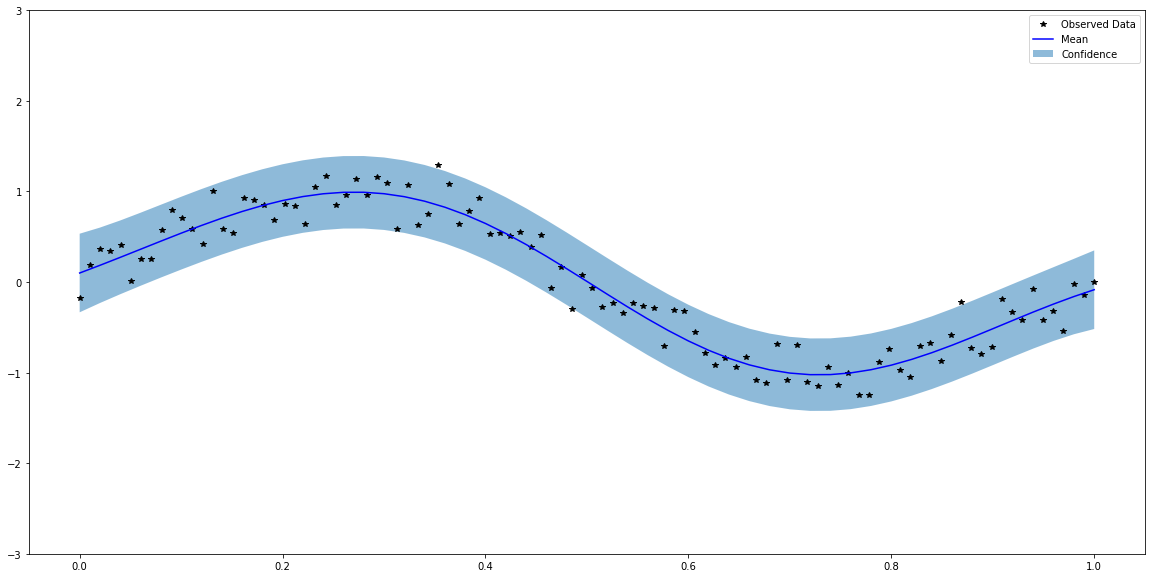

In [39]:
test_x = torch.linspace(0, 1, 51)
observed_pred = predict(test_model,likelihood, test_x)
plot(observed_pred,  train_x, train_y,test_x)